<a href="https://colab.research.google.com/github/NguyenHoang127/AI_Exercise_All/blob/main/ANN_Multi_Layer_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#Bài Toán 3 kênh
#keras/datasets/afar10/load_data()

from keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
print(x_train.shape) #Hiển thị số giá trị
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


Hình này là:  [7]


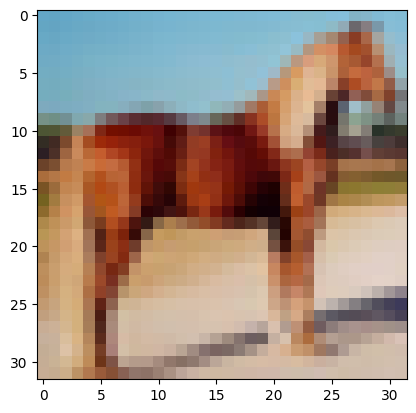

In [22]:
#Hiển thị 1 hình bất kỳ

hinh = x_train[43]
plt.imshow(hinh, cmap= plt.cm.binary)
plt.show
print('Hình này là: ', y_train[43])

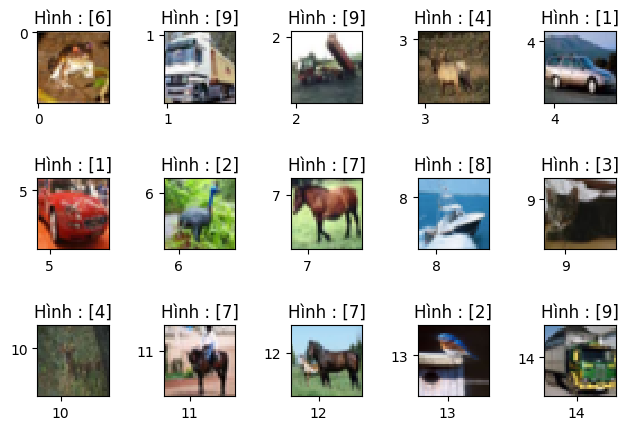

In [23]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation = 'none')
  plt.title('Hình : {}'.format(y_train[i]))
  plt.xticks([i])
  plt.yticks([i])

In [24]:
from keras import models
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.serialization import activation

In [25]:
model = Sequential()
model.add(Dense(7000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(3500,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))


model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 7000)              21511000  
                                                                 
 dense_12 (Dense)            (None, 3500)              24503500  
                                                                 
 dense_13 (Dense)            (None, 1000)              3501000   
                                                                 
 dense_14 (Dense)            (None, 500)               500500    
                                                                 
 dense_15 (Dense)            (None, 10)                5010      
                                                                 
Total params: 50,021,010
Trainable params: 50,021,010
Non-trainable params: 0
_________________________________________________________________


In [26]:
X = x_test
Y = y_test

In [27]:
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255
print(x_train.shape)

(50000, 3072)


In [28]:
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255
print(x_test.shape)

(10000, 3072)


In [29]:
from keras.utils import to_categorical #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)

(50000, 10)


In [30]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs =10,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Độ chính xác trên tập kiểm tra:',test_acc)
print('Hàm mất mát trên tập kiểm tra:',test_loss)

Epoch 1/10
391/391 [==============================] - 662s 2s/step - loss: 2.3532 - accuracy: 0.2211
Epoch 2/10
391/391 [==============================] - 672s 2s/step - loss: 1.8721 - accuracy: 0.3218
Epoch 3/10
391/391 [==============================] - 667s 2s/step - loss: 1.7800 - accuracy: 0.3601
Epoch 4/10
391/391 [==============================] - 657s 2s/step - loss: 1.7060 - accuracy: 0.3833
Epoch 5/10
391/391 [==============================] - 653s 2s/step - loss: 1.6524 - accuracy: 0.4084
Epoch 6/10
391/391 [==============================] - 651s 2s/step - loss: 1.6051 - accuracy: 0.4250
Epoch 7/10
391/391 [==============================] - 649s 2s/step - loss: 1.5581 - accuracy: 0.4396
Epoch 8/10
391/391 [==============================] - 657s 2s/step - loss: 1.5266 - accuracy: 0.4561
Epoch 9/10
391/391 [==============================] - 654s 2s/step - loss: 1.4897 - accuracy: 0.4679
Epoch 10/10
313/313 [==============================] - 37s 118ms/step - loss: 1.7630 - accu

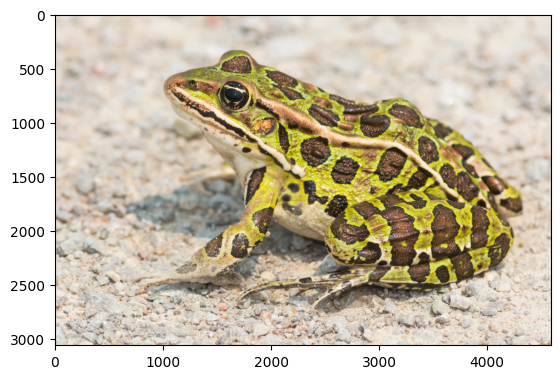

In [36]:
url = 'frog.jpg'
img = plt.imread(url)
plt.imshow(img)
plt.show()

In [37]:
model.save('mode3d.h5')

1/1 [==============================] - 0s 140ms/step


array([6])

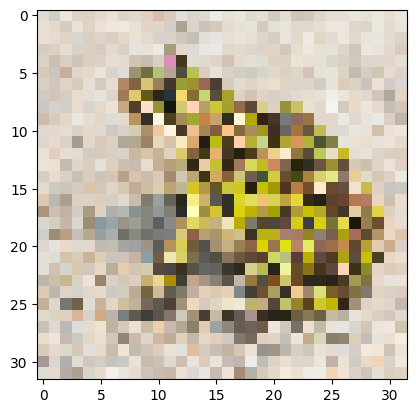

In [38]:
from keras.utils.image_utils import img_to_array,load_img
img = load_img(url,target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)